In [45]:
# import all the required libraries
import pandas as pd
import numpy as np
import re
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from time import time
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
#load data
df = pd.read_csv("Emotion_Unbalanced_15000.csv")

In [46]:
# total unique features in the dataset
uniquewords = pd.Series(' '.join(df['content']).split()).value_counts()
uniquewords.count()

15012

In [47]:
# Classifiying the labels are by calling the function and put it in new column Emot
df['Emot'] = df['Emotion']

In [48]:
from collections import Counter
# Counts the total features for each classifier
Counter(df["Emot"])

Counter({'sadness': 4361,
         'joy': 5077,
         'love': 1244,
         'anger': 2063,
         'fear': 1717,
         'surprise': 1007})

In [49]:
# connvert the features into lowercase
df['content'] = df['content'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['content'].head()

0    i feel awful about it too because it s my job ...
1                                im alone i feel awful
2             i was feeling a little low few days back
3    i also feel disillusioned that someone who cla...
4    i wish you knew every word i write i write for...
Name: content, dtype: object

In [50]:

df['content'] = df['content'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
df['content'].head()

0    i feel awful about it too because it s my job ...
1                                im alone i feel awful
2             i was feeling a little low few days back
3    i also feel disillusioned that someone who cla...
4    i wish you knew every word i write i write for...
Name: content, dtype: object

In [51]:
df['content'] = df['content'].apply(lambda x: " ".join(x for x in x.split() if x[0]!="@"))
df['content'].head()

0    i feel awful about it too because it s my job ...
1                                im alone i feel awful
2             i was feeling a little low few days back
3    i also feel disillusioned that someone who cla...
4    i wish you knew every word i write i write for...
Name: content, dtype: object

In [52]:
df['content'] = df['content'].apply(lambda x: " ".join(x for x in x.split() if x[0]!="#"))
df['content'].head()

0    i feel awful about it too because it s my job ...
1                                im alone i feel awful
2             i was feeling a little low few days back
3    i also feel disillusioned that someone who cla...
4    i wish you knew every word i write i write for...
Name: content, dtype: object

In [53]:
# Do the spell check
df['content'] = df['content'].apply(lambda x: str(TextBlob(x).correct()))
df['content'].head()

0    i feel awful about it too because it s my job ...
1                                in alone i feel awful
2             i was feeling a little low few days back
3    i also feel disillusioned that someone who cla...
4    i wish you knew every word i write i write for...
Name: content, dtype: object

In [54]:
df['content'] = df['content'].str.replace('\d+', '')
df['content'].head()

0    i feel awful about it too because it s my job ...
1                                in alone i feel awful
2             i was feeling a little low few days back
3    i also feel disillusioned that someone who cla...
4    i wish you knew every word i write i write for...
Name: content, dtype: object

In [55]:
df['content'] = df['content'].map(lambda x: re.sub(r'\W+', ' ', x))
df['content'].head()

0    i feel awful about it too because it s my job ...
1                                in alone i feel awful
2             i was feeling a little low few days back
3    i also feel disillusioned that someone who cla...
4    i wish you knew every word i write i write for...
Name: content, dtype: object

In [56]:
# Remove the stopwords
stop = stopwords.words('english')
df['content'] = df['content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['content'].head()

0           feel awful job get position succeed happen
1                                     alone feel awful
2                         feeling little low days back
3    also feel disillusioned someone claimed value ...
4    wish knew every word write write think useless...
Name: content, dtype: object

In [57]:

st = SnowballStemmer("english")
df['content'] = df['content'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
df['content'].head()

0                 feel aw job get posit succeed happen
1                                         alon feel aw
2                              feel littl low day back
3     also feel disillus someon claim valu truth fraud
4    wish knew everi word write write think useless...
Name: content, dtype: object

In [58]:
x = df.content
y = df.Emot

In [59]:

SEED = 100
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=SEED)

In [60]:

print("Train set has total {0} entries with {1:.2f}% sadness, {2:.2f}% joy, {3:.2f}% love, {4:.2f}% anger, {5:.2f}% fear, {6:.2f}% surprise".format(len(x_train),
                                                                              (len(x_train[y_train == "sadness"]) / (len(x_train)*1.))*100,
                                                                            (len(x_train[y_train == "joy"]) / (len(x_train)*1.))*100,
                                                                             (len(x_train[y_train == "love"]) / (len(x_train)*1.))*100,
                                                                            (len(x_train[y_train == "anger"]) / (len(x_train)*1.))*100,
                                                                             (len(x_train[y_train == "fear"]) / (len(x_train)*1.))*100,                                                                        
                                                                            (len(x_train[y_train == "surprise"]) / (len(x_train)*1.))*100))
print("Test set has total {0} entries with {1:.2f}% sadness, {2:.2f}% joy, {3:.2f}% love, {4:.2f}% anger, {5:.2f}% fear , {6:.2f}% surprise".format(len(x_test),
                                                                             (len(x_test[y_test == "sadness"]) / (len(x_test)*1.))*100,
                                                                            (len(x_test[y_test == "joy"]) / (len(x_test)*1.))*100,
                                                                             (len(x_test[y_test == "love"]) / (len(x_test)*1.))*100,
                                                                            (len(x_test[y_test == "anger"]) / (len(x_test)*1.))*100,
                                                                             (len(x_test[y_test == "fear"]) / (len(x_test)*1.))*100,                                                                        
                                                                            (len(x_test[y_test == "surprise"]) / (len(x_test)*1.))*100))


Train set has total 10828 entries with 28.02% sadness, 33.21% joy, 8.19% love, 13.07% anger, 11.09% fear, 6.42% surprise
Test set has total 4641 entries with 28.59% sadness, 31.91% joy, 7.69% love, 13.96% anger, 11.12% fear , 6.72% surprise


In [61]:
def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
#     print("accuracy score: {0:.2f}%".format(accuracy*100)) 
#     print("-"*80) 
    return accuracy

In [62]:
def nfeature_accuracy_checker(vectorizer, n_features, stop_words, ngram_range, classifier):
    result = []
#     print (classifier)
#     print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
#         print("Validation result for {} features".format(n)) 
        nfeature_accuracy = accuracy_summary(checker_pipeline, x_train, y_train, x_test, y_test)
        result.append((n,nfeature_accuracy))
    return result

In [63]:

def plot_feature_comparision(ug, bg, tg):
    nfeatures_plot_tg = pd.DataFrame(tg,columns=['nfeatures','validation_accuracy'])
    nfeatures_plot_bg = pd.DataFrame(bg,columns=['nfeatures','validation_accuracy'])
    nfeatures_plot_ug = pd.DataFrame(ug,columns=['nfeatures','validation_accuracy'])

    plt.figure(figsize=(8,6))
    plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram')
    plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram')
    plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram')
    plt.title("N-gram(1~3) test result : Accuracy")
    plt.xlabel("Number of features")
    plt.ylabel("Validation set accuracy")
    plt.legend()
    return;

In [64]:
def get_best_ngrams(cvec, n_features, stp, cls):
    ngs = [
    (1,1),
    (1,2),
    (1,3)]
    feature_result_ug = ''
    feature_result_bg = ''
    feature_result_tg = ''
    for ng in ngs:
        if ng == (1,1):
#             print("RESULT FOR UNIGRAM\n") 
            feature_result_ug = nfeature_accuracy_checker(cvec, n_features, stp, ng, cls)
        elif ng == (1,2):
#             print("RESULT FOR BIGRAM\n")
            feature_result_bg = nfeature_accuracy_checker(cvec, n_features, stp, ng, cls)
        elif ng == (1,3):
#             print("RESULT FOR TRIGRAM\n") 
            feature_result_tg = nfeature_accuracy_checker(cvec, n_features, stp, ng, cls)
    print (cls)
    plot_feature_comparision(feature_result_ug, feature_result_bg, feature_result_tg)
    return;

In [65]:
def train_test_and_evaluate(pipeline, x_train, y_train, x_test, y_test):
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    conmat = np.array(confusion_matrix(y_test, y_pred, labels=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']))
    confusion = pd.DataFrame(conmat, index=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'],
                         columns=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])
    print("accuracy score: {0:.2f}%".format(accuracy*100)) 
    print("-"*80)
    print("Confusion Matrix\n")
    print(confusion) 
    print("-"*80) 
    print("Classification Report\n") 
    print(classification_report(y_test, y_pred, target_names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])) 

In [79]:
def classifivation_report(mf, ng, spl):
    ug_cvec = TfidfVectorizer(max_features=mf, ngram_range=ng)
    ug_pipeline = Pipeline([
            ('vectorizer', ug_cvec),
            ('classifier', cls)
        ])
    sentiment_fit = train_test_and_evaluate(ug_pipeline, x_train, y_train, x_test, y_test)
    cv_kfold(spl, ug_pipeline)
    return sentiment_fit, ug_pipeline;

In [80]:
# this function performs K-fold cross valdation for K=10
def cv_kfold(spl, pipeline):
    kf = KFold(n_splits=spl, shuffle=True)
    kf.get_n_splits(x)
    print(kf) 
    accuracy_kfold = 0
    accuracy_kfold_avg = 0
    for train_index, test_index in kf.split(x):
        x_train_cv, x_test_cv = x[train_index], x[test_index]
        y_train_cv, y_test_cv = y[train_index], y[test_index]

        accuracy_kfold_avg
        accuracy_kfold
        fit = pipeline.fit(x_train_cv, y_train_cv)
        y_pred_cv = fit.predict(x_test_cv)
        accuracy_kfold = accuracy_score(y_test_cv, y_pred_cv)
        accuracy_kfold_avg = accuracy_kfold_avg + accuracy_score(y_test_cv, y_pred_cv)
        print(accuracy_kfold)

    print("Avg Accuracy",accuracy_kfold_avg/kf.get_n_splits())

In [81]:
df['totalwords'] = [len(x.split()) for x in df['content'].tolist()]
# df['totalwords'].head()
df.totalwords.sum(axis = 0, skipna = True) 

139678

In [82]:
freq = pd.Series(' '.join(df['content']).split()).value_counts()
freq.count()

7830

In [83]:
cvec = TfidfVectorizer()
n_features = np.arange(1000,8001,500)
stp = None

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)


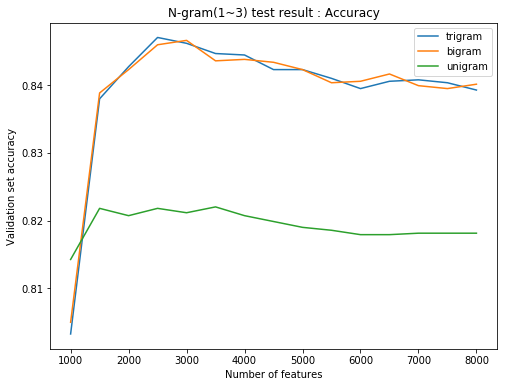

In [84]:
cls = LogisticRegression(solver='newton-cg', multi_class='multinomial')
get_best_ngrams(cvec, n_features, stp, cls)

In [85]:
mf_ = 3000
ng_ = (1,2)
spl_= 10
sentiment_fit, ug_pipeline = classifivation_report(mf_, ng_, spl_)

accuracy score: 84.66%
--------------------------------------------------------------------------------
Confusion Matrix

          sadness   joy  love  anger  fear  surprise
sadness      1233    62     6     18     7         1
joy            34  1391    34      1     7        14
love           19   125   204      6     2         1
anger          68    68     6    477    26         3
fear           33    50     1      7   392        33
surprise       17    38     1      2    22       232
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

     sadness       0.93      0.74      0.82       648
         joy       0.86      0.76      0.81       516
        love       0.80      0.94      0.87      1481
       anger       0.81      0.57      0.67       357
        fear       0.88      0.93      0.90      1327
    surprise       0.82      0.74      0.78       312

   micro avg       0.85

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


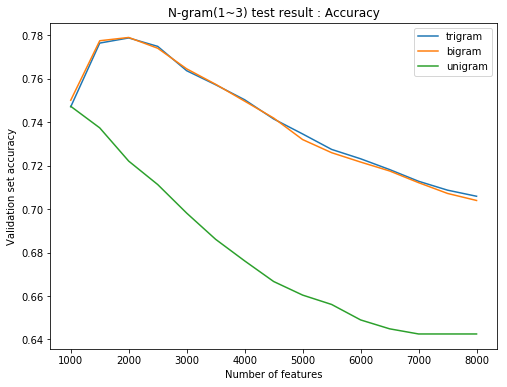

In [86]:
cls = MultinomialNB()
get_best_ngrams(cvec, n_features, stp, cls)

In [87]:
mf_ = 2500
ng_ = (1,2)
sentiment_fit, ug_pipeline = classifivation_report(mf_, ng_, spl_)

accuracy score: 77.40%
--------------------------------------------------------------------------------
Confusion Matrix

          sadness   joy  love  anger  fear  surprise
sadness      1221    91     1      7     6         1
joy            43  1432     3      0     2         1
love           41   202   106      5     2         1
anger         107   116     1    407    15         2
fear           67   105     0      7   319        18
surprise       41   135     0      4    25       107
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

     sadness       0.95      0.63      0.76       648
         joy       0.86      0.62      0.72       516
        love       0.69      0.97      0.80      1481
       anger       0.95      0.30      0.45       357
        fear       0.80      0.92      0.86      1327
    surprise       0.82      0.34      0.48       312

   micro avg       0.77

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)


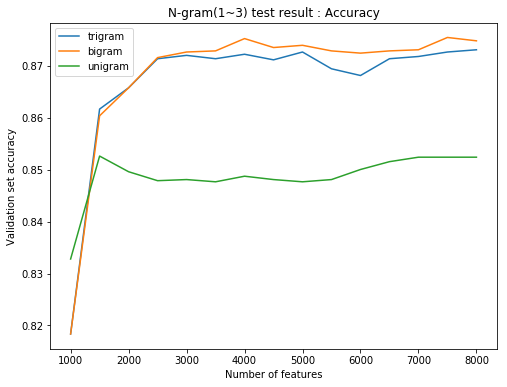

In [88]:
cls = LinearSVC()
get_best_ngrams(cvec, n_features, stp, cls)

In [89]:
mf_ = 4000
ng_ = (1,2)
sentiment_fit, ug_pipeline = classifivation_report(mf_, ng_, spl_)

accuracy score: 87.52%
--------------------------------------------------------------------------------
Confusion Matrix

          sadness   joy  love  anger  fear  surprise
sadness      1226    49     7     25    14         6
joy            32  1359    51      7    11        21
love           16    72   262      5     1         1
anger          52    34     4    526    27         5
fear           15    21     1     12   434        33
surprise        7    20     3      3    24       255
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

     sadness       0.91      0.81      0.86       648
         joy       0.85      0.84      0.85       516
        love       0.87      0.92      0.90      1481
       anger       0.80      0.73      0.76       357
        fear       0.91      0.92      0.92      1327
    surprise       0.79      0.82      0.81       312

   micro avg       0.88

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)


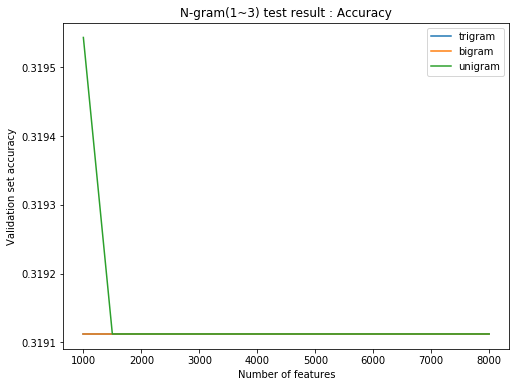

In [90]:
cls = SVC(kernel='rbf', random_state=0, gamma=.01, C=1)
get_best_ngrams(cvec, n_features, stp, cls)

In [93]:
mf_ = 1500
ng_ = (1,1)
sentiment_fit, ug_pipeline = classifivation_report(mf_, ng_, spl_)

accuracy score: 31.91%
--------------------------------------------------------------------------------
Confusion Matrix

          sadness   joy  love  anger  fear  surprise
sadness         0  1327     0      0     0         0
joy             0  1481     0      0     0         0
love            0   357     0      0     0         0
anger           0   648     0      0     0         0
fear            0   516     0      0     0         0
surprise        0   312     0      0     0         0
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

     sadness       0.00      0.00      0.00       648
         joy       0.00      0.00      0.00       516
        love       0.32      1.00      0.48      1481
       anger       0.00      0.00      0.00       357
        fear       0.00      0.00      0.00      1327
    surprise       0.00      0.00      0.00       312

   micro avg       0.32

C:\Users\Kopal-PC\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.33160956690368454
0.31157078215901746
0.33160956690368454
0.3354880413703943
0.32320620555914675
0.3451842275371687
0.3438914027149321
0.3251454427925016
0.32191338073691017
0.351228978007762
Avg Accuracy 0.33208475946852023


C:\Users\Kopal-PC\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)


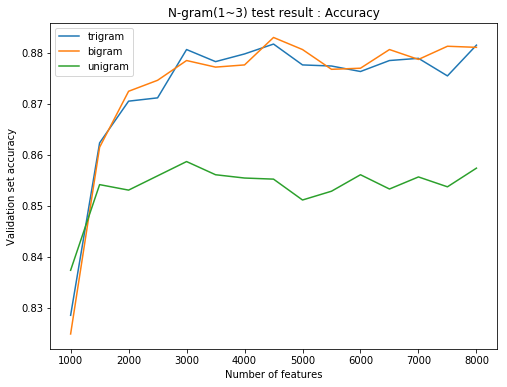

In [94]:
cls = SGDClassifier()
get_best_ngrams(cvec, n_features, stp, cls)

In [95]:
mf_ = 4500
ng_ = (1,2)
sentiment_fit, ug_pipeline = classifivation_report(mf_, ng_, spl_)

accuracy score: 87.93%
--------------------------------------------------------------------------------
Confusion Matrix

          sadness   joy  love  anger  fear  surprise
sadness      1220    56     4     27    15         5
joy            30  1364    41     11    12        23
love           22    81   243      8     1         2
anger          42    29     4    538    32         3
fear           14    15     0     12   436        39
surprise        5     7     2      5    13       280
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

     sadness       0.90      0.83      0.86       648
         joy       0.86      0.84      0.85       516
        love       0.88      0.92      0.90      1481
       anger       0.83      0.68      0.75       357
        fear       0.92      0.92      0.92      1327
    surprise       0.80      0.90      0.84       312

   micro avg       0.88

C:\Users\Kopal-PC\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.8642533936651584
0.8674854557207499
0.8739495798319328
0.885585003232062
0.8694246929541047
0.8784744667097608
0.8901098901098901
0.8914027149321267
0.8707175177763413
0.8783958602846055
Avg Accuracy 0.8769798575216734


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')


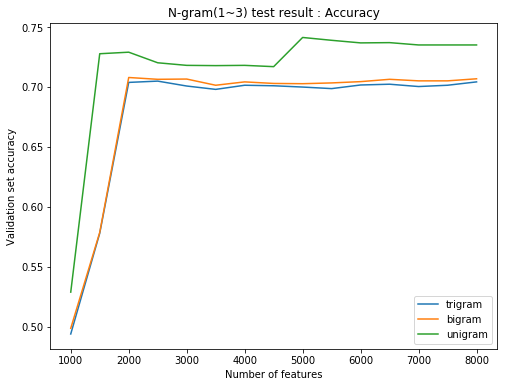

In [96]:
cls = KNeighborsClassifier()
get_best_ngrams(cvec, n_features, stp, cls)

In [97]:
mf_ = 5000
ng_ = (1,1)
sentiment_fit, ug_pipeline = classifivation_report(mf_, ng_, spl_)

accuracy score: 74.12%
--------------------------------------------------------------------------------
Confusion Matrix

          sadness   joy  love  anger  fear  surprise
sadness      1050   158    17     50    46         6
joy            71  1255    39     54    36        26
love           39   107   178     19    13         1
anger          75    75     8    455    30         5
fear           28    73     3     31   350        31
surprise       33    69     6     19    33       152
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

     sadness       0.72      0.70      0.71       648
         joy       0.69      0.68      0.68       516
        love       0.72      0.85      0.78      1481
       anger       0.71      0.50      0.59       357
        fear       0.81      0.79      0.80      1327
    surprise       0.69      0.49      0.57       312

   micro avg       0.74

C:\Users\Kopal-PC\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


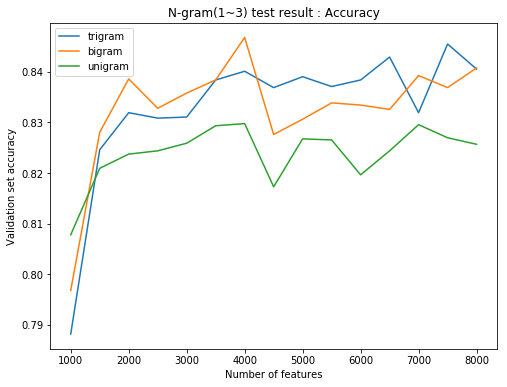

In [98]:
cls = RandomForestClassifier()
get_best_ngrams(cvec, n_features, stp, cls)

In [99]:
mf_ = 4000
ng_ = (1,2)
sentiment_fit, ug_pipeline = classifivation_report(mf_, ng_, spl_)

accuracy score: 84.21%
--------------------------------------------------------------------------------
Confusion Matrix

          sadness   joy  love  anger  fear  surprise
sadness      1165    72    14     36    28        12
joy            74  1284    51     23    24        25
love           10   113   223      6     2         3
anger          32    48     3    531    27         7
fear           11    21     1     10   429        44
surprise        2    14     1      0    19       276
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

     sadness       0.88      0.82      0.85       648
         joy       0.81      0.83      0.82       516
        love       0.83      0.87      0.85      1481
       anger       0.76      0.62      0.69       357
        fear       0.90      0.88      0.89      1327
    surprise       0.75      0.88      0.81       312

   micro avg       0.84